In [31]:
using PyPlot
using ASCIIPlots

In [32]:
unit=[cos(π/6),sin(π/6)];
unitM=[[0 0]
    [cos(π/6) sin(π/6)]];

In [33]:
a=[2*cos(π/6),0];
b=[cos(π/6),1+sin(π/6)];

In [43]:
Na=6
Nb=6
N=Na*Nb*2

aM=transpose(repeat(a,outer=[1,2]))
bM=transpose(repeat(b,outer=[1,2*Na]))

X=Array{Float64}(N,2);
Bonds=Array{Int32}(N,3);

In [44]:
for i in 1:Na
    X[2*i-1:2*i,:]=unitM+(i-1)*aM;
    Bonds[2*i-1,1]=2*i;
    Bonds[2*i,1]=2*i-1;
    if i<Na 
        Bonds[2*i,2]=2*i+1;
        Bonds[2*i+1,2]=2*i;
    end
    
    Bonds[2*i+(Nb-1)*Na*2,3]=2*i-1
    Bonds[2*i-1,3]=2*i+(Nb-1)*Na*2
end

Bonds[1,2]=2*Na;
Bonds[2*Na,2]=1;

for j in 1:(Nb-1)
    X[2*Na*j+1:2*Na*(j+1),:]=X[1:2*Na,:]+j*bM;

    Bonds[2*Na*j+1:2*Na*(j+1),1]=Bonds[1:2*Na,1]+2*Na*(j);
    Bonds[2*Na*j+1:2*Na*(j+1),2]=Bonds[1:2*Na,2]+2*Na*(j);
    
    for i in 1:Na
        #println(j,' ',i,' ',2*i+j*2*Na-1, ' ',2*i+(j-1)*2*Na)
        Bonds[2*i+j*2*Na-1,3]=2*i+(j-1)*2*Na
        Bonds[2*i+(j-1)*2*Na,3]=2*i+j*2*Na-1
    end 
end

In [45]:
scatterplot(X[:,1],X[:,2])


	-------------------------------------------------------------
	|                      ^      ^      ^       ^      ^       ^| 8.00
	|                                                            |
	|                  ^      ^       ^      ^      ^       ^    |
	|                                                            |
	|                  ^      ^       ^      ^      ^       ^    |
	|              ^       ^      ^      ^       ^      ^        |
	|                                                            |
	|                                                            |
	|              ^       ^      ^      ^       ^      ^        |
	|           ^      ^      ^       ^      ^      ^            |
	|                                                            |
	|           ^      ^      ^       ^      ^      ^            |
	|       ^      ^       ^      ^      ^       ^               |
	|                                                            |
	|                                 

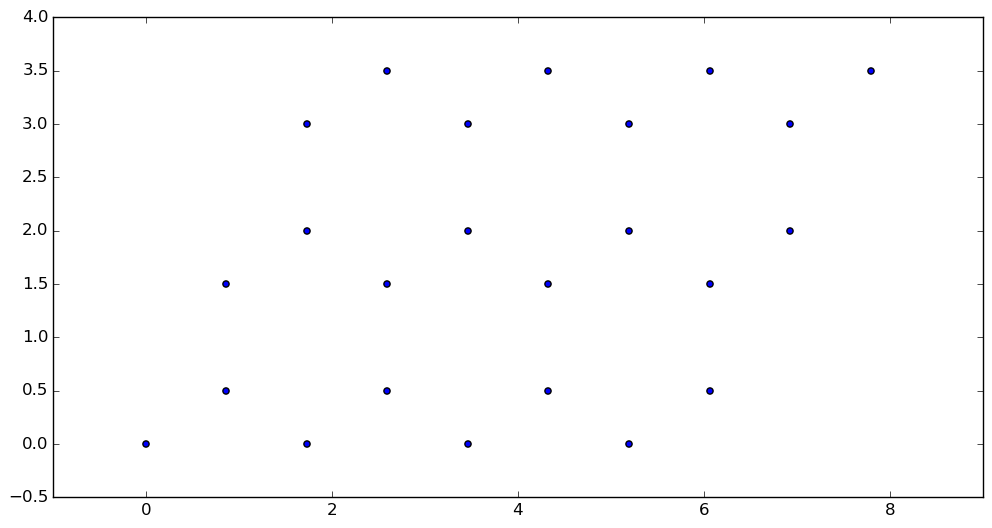

PyObject <matplotlib.collections.PathCollection object at 0x7f231a715e50>

In [29]:
w, h = plt[:figaspect](.5)
figure(figsize=(w,h))
scatter(X[:,1],X[:,2])

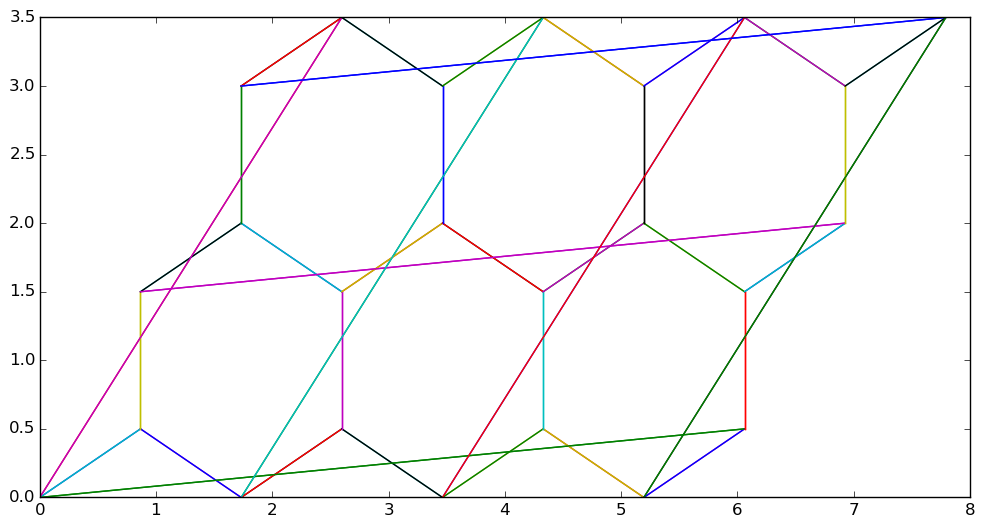

In [30]:
w, h = plt[:figaspect](.5)
figure(figsize=(w,h))
for i in 1:N
    xx=[X[i,1], X[Bonds[i,1],1] ]
    yx=[X[i,2], X[Bonds[i,1],2] ]
    plot(xx,yx)
        
    xx=[X[i,1], X[Bonds[i,2],1] ]
    yx=[X[i,2], X[Bonds[i,2],2] ]
    plot(xx,yx)
    
    #println(i,' ',Bonds[i,3])
    xx=[X[i,1], X[Bonds[i,3],1] ]
    yx=[X[i,2], X[Bonds[i,3],2] ]
    plot(xx,yx)
end